# Обучение с подкреплением

## Обучение с учителем

Если у нас есть набор примеров с правильными ответами, то мы используем эту выборку для обучения нашей модели, а после обучения, применяем её к неразмеченным данным. Именно этот подход мы использовали, когда обучали классификатор для MNIST, подавая на вход сети картинки с изображениями рукописных цифр и считая градиент для подстройки весов на основе разницы между известным лэйблом цифры и выходом нейросети.

## Обучение без учителя

В некоторых случаях у нас нет размеченных данных, на которых мы могли бы заранее обучить модель. Но, при решении некоторых задач, можно обойтись без размеченной выборки. Примером такой задачи является задача кластеризации.

## Обучение с подкреплением

В некоторых случаях существующие методы обучения без учителя нам не подходят. В то же время у нас нет возможности создать качественную обучающую выборку. При этом мы можем постфактум оценить действия нашей модели и использовать эту оценку подстроить модель так, чтобы она чаще совершала желательные действия и реже - нежелательные. В литературе такую оценку называют вознаграждением (reward), а обучение строится таким образом, чтобы это модель стремилась максимизироавть получаемое вознаграждение.

### Терминология: Агент и среда

Агент и среда - ключевые понятия в обучении с подкрелением.

**Агент** - программа, принимающая решение о дальнейших действиях на основе информации о состоянии среды.

**Среда** - это мир, в котором агент должен "выживать", т.е. всё, с чем агент может прямо или косвенно взаимодействовать. Среда обладает состоянием (State), агент может влиять на среду, совершая какие-то действия (Actions), переводя среду при этом из одного состояния в другое и получая какое-то вознаграждение. Среда описывается пространством возможных состояний. Конкретное состояние - вектор в этом пространстве.

<img src="agend_and_environment.gif">

В зависимости от конкретной задачи, агент может наблюдать либо полное состояние среды, либо только некоторую его часть. Во втором случае, агенту может потребоваться какое-то внутреннее представление полного состояния, которое будет обновляться по мере получения новых данных.

## Наиболее яркие примеры использования обучения с подкреплением
- В 2013 году DeepMind публикует статью Playing Atari with Deep Reinforcement Learning, где нейросети обучаются игре в старые игры от Atari, используя анализ изображения.
- В 2016 году нейросеть AlphaGO Google DeepMind  обыгрывает одного из сильнейших игроков в Go - Ли Седоля. При обучении AlphaGo использовались партии игры живых людей. Чуть позже будет представлена AlphaGO Zero, обучение которой было полностью построено на игре с самой собой. Новая сеть выиграла у старой со счётом 100:0, причём аппаратные ресурсы сократились с 48 TPU до 4 TPU (Tensor Processing Unit Google).
- В 2017 году нейросеть OpenAI 5 успешно участвует в соревновании по игре Dota.

## Классификация алгоритмов обучения с подкреплением

### Model-free / Model-based

Model-free не строит модель окружения или функции вознаграждения. Model-based алгоритм пытаетс предсказывать, каким будет следующее состояние окружения или вознаграждение.

### Value-based / policy-based

Policy-based  методы оптимизируют напрямую функцию принятия решения агента. Стратегия (policy) обычно представлена распределением вероятности доступных действий. Value-based метод оптимизирует оценку вознаграждения для всех действий и выбирает выбирает то-действие, по которому прогнозируется большее значение. Методы, основанные на Policy Gradients лучше работают при большой размерности пространства действий, а Value-based методы, такие, как Deep Q-Learning требуют меньшего количества повторений для сходимости при малой размерности.

### On-Policy / Off-Policy

Off-policy подход позволяет учиться на исторических данных или на записанных заранее действиях человека. On-policy - только на собственных действиях агента.

### Deterministic Policy / Stochastic Policy

В зависимости от среды, наша стратегия может быть либо детерминированной - выбираем сразу определённое действие с помощью argmax, либо стохастической, когда мы окончательное решение принимается с помощью генератора случайных чисел на основе распределения вероятности, выданного сетью.
 

- Q-learning
- Deep Q-learning (DQN)
- Double Deep Q-learning (DDQN)
- Proximal Policy Optimization
- Rainbow



# Недостатки RL

## Низкая скорость обучения (sample efficiency)

Общая проблема всех алгоритмов обучения с подкреплением - низкая скорость обучения. В то время, как человеку может быть достаточно одного повторения, чтобы выучить какое-то действие, агенту RL требуется десятки тысяч повторений даже в простых задачах. В какой-то степени это связано с несовершенством архитектуры, но самый большой вклад даёт тот факт, что человек может использовать накопленный в прошлом опыт из других областей. Игра Montezuma's Revenge - популярный подопытная среда для RL в последнее время. И яркий пример низкой эффективности повторений  у алгоритмов RL по сравнению с человеком. 

Челокек, как правило, быстро понимает, что нужно избегать черепа и забрать ключ, гравитация направлена вниз, а падение с большой высоты опасно. Алгоритму же приходиться обучаться с полного нуля. Если же подменить элементы интерфейса на неочевидные для человека, то его sample-efficency тоже сильно падает (хотя всё-равно лучше, чем RL).

<img src="game_prior.gif" width="700">

<img src="game_no_prior.gif" width="700">

Так же важным фактором являются редкие награды. Часто в ходе одного эпизода алгоритм делает множество различных действий, а награду полуает только в конце. Соответственно, веса сети можно обновить только в конце эпизода и нельзя поощерить или наказать конкретные действия внутри эпизода. В итоге требуется большое количество повторений для достижения оптимальных весов.

Один из способов улучшить эффективность при редких наградах - reward shaping - модификация функции награды так, чтобы явно поощерялись какие-то действия внутри эпизода. Но качественно сконструировать такую функцию тяжело, а ошибки в ней могут приводить к неожиданным эффектам:

<img src="coastrunner.gif" width="700">

В гонке лодок агент получал вознаграждене не только за победу в гонке, но и за сбор всяких ништяков. В итоге он решил, что гонка не очень-то и нужна, достаточно собирать ништяки.

<video controls src="upsidedown_half_cheetah.mp4" width="700"> </video>

У данного агента мы наблюдаем поподание в локлаьный минимум. Этот агент получает поощерение за набранную скорость. На начальном этапе во время случайного поиска агент обнаружил, что кувыркнуться вперёд даёт хорошее вознаграждение в начале. Постепенно, после нескольких попыток, переворачивание на спину закрепилось, как успешная стратегия. После закрепления такого поведения агент не смог выйти из этого состояния, т.к. оказалось проще научиться двигаться в таком состоянии, чем научиться переворачиваться обратно на ноги.

Похожее поведение можно случано получить, если поощерять агента за то, что его ноги оторваны от земли.
    
<video controls src="failed_reacher.mp4" width="700"> </video>

В данном примере случайная инициализация весов получилась такой, что к вращающейся "конечности" в каждой точке прикладывалась большая сила. В результате конечность начала быстро вращаться. Сложность избавления от такого поведения заключается в том, что для того, чтобы отступить от такой стратегии, нужно путём исследования случайных действий предпринять несколько попыток, когда робот не будет вращаться, чтобы такие действия могли закрепиться. Это возможно, но в данном запуске этого не произошло.

# Библиотека Gym

# Пример окружения Gym

In [1]:
envName = 'MountainCar-v0'

In [2]:
import gym
env = gym.make(envName)
MAX_NUM_EPISODES = 10

for episode in range(MAX_NUM_EPISODES):
    done = False
    obs = env.reset()
    total_reward = 0.0 # To keep track of the total reward obtained in each episode
    step = 0
    while not done:
        env.render()
        
        
        
        action = env.action_space.sample()  # Sample random action.
                                            # This will be replaced
                                            # by our agent's action
                                            # when we # start
                                            # developing the agent algorithms
        
        
        next_state, reward, done, info = \
        env.step(action)  # Send the action to the
                          # environment and receive       
                          # the next_state, reward and
                          # whether done or not
        total_reward += reward
        step += 1
        obs = next_state
    print("\n Episode #{} ended in {} steps. total_reward={}".format(episode, step+1,
total_reward))
env.close()


 Episode #0 ended in 201 steps. total_reward=-200.0

 Episode #1 ended in 201 steps. total_reward=-200.0

 Episode #2 ended in 201 steps. total_reward=-200.0

 Episode #3 ended in 201 steps. total_reward=-200.0

 Episode #4 ended in 201 steps. total_reward=-200.0

 Episode #5 ended in 201 steps. total_reward=-200.0

 Episode #6 ended in 201 steps. total_reward=-200.0

 Episode #7 ended in 201 steps. total_reward=-200.0

 Episode #8 ended in 201 steps. total_reward=-200.0

 Episode #9 ended in 201 steps. total_reward=-200.0


# Q-Learning

Q-Learning - это метод основанный на представлении функции полезности Q(s, a) в виде таблицы. Соответственно, такой метод применим только для дискретного набора действий и дискретного количества состояний среды, причём желательно, чтобы число возможных действия и число состояний было небольшим. Ограниченно этот метод можно применить к средам с непрерывным состоянием, если его искусственно дискретизировать.



Если ввести функцию дисконтированного будущего вознаграждения:

\\[ R_t = \sum_{k=0}^{\infty}{\gamma^{k} r_{t+k+1}}, \quad где \quad \gamma \in (0, 1] \\],

то можно определить функцию \\( Q(s, a) \\) как математическое ожидание будущего вознаграждения при выполнении действий \\( a \\) в состоянии \\( s \\),

\\[ Q(S, A) = max_{\pi} \mathbb{E} [G_t | S_t = s, A_t = a, \pi] \\]

SARSA (State, Action, Reward, State, Action) /* on-policy */:

\\[ Q(S_t, A_t) = (1 - \alpha) Q(S_t, A_t) + \alpha [r_{t+1} + \gamma Q(S_{t+1}, A_{t+1})] \\]

\\[ Q(S_t, A_t) = Q(S_t, A_t) + \alpha [r_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)] \\]

\\[ TD_{target} = r + \gamma Q(S_{t+1},A_{t+1})\\]

\\[ TD_{error} = TD_{target} - Q(S_t, A_t) \\]

Q-обучение /* off-policy */:

Уравнение Беллмана:

\\[ Q(S_t,A_t) = Q(S_t, A_t) + \alpha [r_{t+1} +  \gamma \cdot max_{a}{Q(S_{t+1},a}) - Q(S_t, A_t) ] \\]

\\[ TD_{target} = r + \gamma max_{a} Q(S_{t+1},a)\\]

\\[ TD_{error} = TD_{target} - Q(S_t, A_t) \\]


In [11]:
import numpy as np
import gym

EPSILON_MIN = 0.005
MAX_NUM_EPISODES = 20000
MAX_STEPS_PER_EPISODE = 500
max_num_steps = MAX_NUM_EPISODES * MAX_STEPS_PER_EPISODE
EPSILON_DECAY = 500 * EPSILON_MIN / max_num_steps
ALPHA = 0.05 # learning rate
GAMMA = 0.95 # Discount factor
NUM_DISCRETE_BINS = 30  # Number of bins to Discretize each
                        # observation dim

class QAgent():
    def __init__(self, env):
        self.obs_shape = env.observation_space.shape
        self.obs_high = env.observation_space.high
        self.obs_low = env.observation_space.low
        self.obs_bins = NUM_DISCRETE_BINS
        self.bin_width = (self.obs_high - self.obs_low) \
            / self.obs_bins
        self.action_shape = env.action_space.n
        # Create a table to represent the Q-values
        self.Q = np.zeros((self.obs_bins + 1, self.obs_bins + 1,
                          self.action_shape)) # (51 x 51 x 3)
        self.alpha = ALPHA
        self.gamma = GAMMA
        self.epsilon = 1.0
    
    
    def discretize(self, obs):
        return tuple(((obs - self.obs_low) \
                      / self.bin_width).astype(int))
    
    
    def get_action(self, obs):
        discretized_obs  = self.discretize(obs)
        # Epsilon-Greedy action selection
        if self.epsilon > EPSILON_MIN:
            self.epsilon -= EPSILON_DECAY
        if np.random.random() > self.epsilon:
            return np.argmax(self.Q[discretized_obs])
        else:  # choose a random action
            return np.random.choice([a for a in range(self.action_shape)])
        
    
    def learn(self, obs, action, reward, next_obs):
        discretized_obs = self.discretize(obs)
        discretized_next_obs = self.discretize(next_obs)
        td_target = reward + self.gamma * np.max(self.Q[discretized_next_obs])
        td_error = td_target - self.Q[discretized_obs][action]
        self.Q[discretized_obs][action] +=  self.alpha * td_error


def train_Q(agent, env):
    best_reward = -float('inf')
    for episode in range(MAX_NUM_EPISODES):
        done = False
        obs = env.reset()
        total_reward = 0.0
        while not done:
            action = agent.get_action(obs)
            next_obs, reward, done, info = env.step(action)
            agent.learn(obs, action, reward, next_obs)
            obs = next_obs
            total_reward += reward
        best_reward = max(best_reward, total_reward)
        print("\rEpisode#:{} reward:{} best_reward:{} eps:{}"
             .format(episode, total_reward, best_reward, agent.epsilon), end="")
        
    # Return the trained policy
    return np.argmax(agent.Q, axis=2)


def test_Q(agent, env, policy):
    done = False
    obs = env.reset()
    total_reward = 0.0
    while not done:
        action = policy[agent.discretize(obs)]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        total_reward += reward
    return total_reward


if __name__ == "__main__":
    env = gym.make(envName)
    agent = QAgent(env)
    learned_policy = train_Q(agent, env)
    # Use the Gym Monitor wrapper to evaluate the agent and record video
    gym_monitor_path = "./gym_monitor_output"
    env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
    for _ in range(1000):
        test_Q(agent, env, learned_policy)
    env.close()

Episode#:19999 reward:-160.0 best_reward:-117.0 eps:0.032830999948725846

# Deep Q-Networks

Таблицу, аппроксимирующую нашу функцию качества можно заменить нейросетью, которая будет предсказывать значению Q сразу для всех возможных действий. В этом случае нам нужно определить функцию потерь, от которой мы будем считать градиент.

\\[ L = {TD_{error}}^2 \\]
\\[ L = (r + \gamma max_a Q(S_t, a) - Q(S_t, A_t))^2 \\]

# Улучшения DQN

## Experience replay

В большинстве окружений информация, получаемая агентом распределена не независимо. Т.е. последовательные наблюдения агента сильно коррелированы между собой (что понятно из интуитивных соображений, т.к. большинство окружений, в которых применяется RL, предполагают, что все изменения в них последовательны). Корреляция примеров ухудшает сходимость стохастического градиентного спуска. Таким образом нам нужен способ, который позволяет улучшить распределение примеров для обучения (устранить или снизить корреляцию между ними). Обычно используется метод **проигрывания опыта (experience replay)**. Суть этого метода в том, что мы сохраняем некоторое количество примеров (состояние, действия, вознаграждение) в специальном буфере и для обучения выбираем случайные мини-батчи из этого буфера.

Так же **experience replay** позволяет агенту эффективнее использовать свой прошлый опыт.

## Double DQN

Одной из проблем Q-Networks является неустойчивость. Часто разность ожидаемых вознаграждений для различных действий близка и поскольку выбор действия производится с помощью argmax, то выброс в данных может привести к тому, что выбираемое действие изменится. Для того, чтобы повысить стабильность используется техника **Target Q-Network**. Суть в том, что мы замораживаем веса нашей сети на фиксированное число шагов и затем используем её для вычисления функции ошибки и обучения второй сети. Периодически копируем из веса рабочей сети в Target Q-Network.
В следующем примере мы будем делать это каждый эпизод.

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_58 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_61 (Dense)             (None, 24)                600       
________________________________

episode: 83   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 84   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 85   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 86   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 87   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 88   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 89   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 90   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 91   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 92   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 93   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 94   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 95   sc

episode: 182   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 183   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 184   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 185   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 186   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 187   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 188   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 189   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 190   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 191   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 192   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 193   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 281   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 282   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 283   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 284   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 285   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 286   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 287   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 288   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 289   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 290   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 291   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 292   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 380   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 381   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 382   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 383   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 384   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 385   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 386   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 387   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 388   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 389   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 390   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 391   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 479   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 480   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 481   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 482   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 483   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 484   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 485   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 486   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 487   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 488   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 489   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 490   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 578   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 579   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 580   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 581   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 582   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 583   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 584   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 585   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 586   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 587   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 588   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 589   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 677   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 678   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 679   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 680   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 681   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 682   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 683   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 684   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 685   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 686   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 687   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 688   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 776   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 777   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 778   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 779   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 780   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 781   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 782   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 783   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 784   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 785   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 786   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 787   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 875   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 876   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 877   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 878   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 879   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 880   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 881   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 882   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 883   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 884   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 885   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 886   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 974   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 975   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 976   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 977   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 978   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 979   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 980   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 981   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 982   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 983   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 984   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 985   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
epis

episode: 1072   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1073   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1074   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1075   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1076   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1077   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1078   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1079   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1080   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1081   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1082   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1083   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1170   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1171   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1172   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1173   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1174   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1175   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1176   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1177   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1178   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1179   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1180   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1181   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1268   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1269   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1270   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1271   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1272   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1273   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1274   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1275   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1276   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1277   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1278   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1279   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1366   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1367   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1368   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1369   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1370   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1371   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1372   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1373   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1374   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1375   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1376   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1377   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1464   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1465   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1466   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1467   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1468   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1469   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1470   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1471   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1472   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1473   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1474   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1475   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1562   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1563   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1564   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1565   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1566   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1567   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1568   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1569   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1570   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1571   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1572   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1573   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1660   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1661   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1662   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1663   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1664   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1665   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1666   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1667   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1668   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1669   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1670   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1671   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1758   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1759   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1760   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1761   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1762   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1763   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1764   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1765   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1766   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1767   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1768   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1769   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1856   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1857   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1858   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1859   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1860   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1861   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1862   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1863   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1864   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1865   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1866   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1867   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 1954   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1955   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1956   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1957   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1958   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1959   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1960   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1961   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1962   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1963   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1964   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 1965   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 2052   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2053   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2054   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2055   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2056   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2057   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2058   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2059   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2060   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2061   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2062   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2063   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 2150   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2151   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2152   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2153   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2154   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2155   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2156   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2157   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2158   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2159   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2160   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2161   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 2248   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2249   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2250   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2251   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2252   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2253   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2254   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2255   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2256   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2257   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2258   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2259   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 2346   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2347   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2348   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2349   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2350   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2351   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2352   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2353   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2354   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2355   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2356   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2357   score: -199.0   memory length: 2000   epsilon: 0.00999867159

episode: 2444   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2445   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2446   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2447   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2448   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2449   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2450   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2451   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2452   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2453   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2454   score: -199.0   memory length: 2000   epsilon: 0.009998671593271896
episode: 2455   score: -199.0   memory length: 2000   epsilon: 0.00999867159

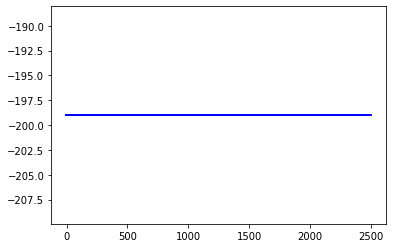

In [20]:
import sys
import gym
import pylab
import random
import numpy as np
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

EPISODES = 2500


# Double DQN Agent for the Cartpole
# it uses Neural Network to approximate q function
# and replay memory & target q network
class DoubleDQNAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = True
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # these is hyper parameters for the Double DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        self.target_model = self.build_model()

        # initialize target model
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_ddqn.h5")

    # approximate Q function using Neural Network
    # state is input and Q Value of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # save sample <s,a,r,s'> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if len(self.memory) < self.train_start:
            return
        batch_size = min(self.batch_size, len(self.memory))
        mini_batch = random.sample(self.memory, batch_size)

        update_input = np.zeros((batch_size, self.state_size))
        update_target = np.zeros((batch_size, self.state_size))
        action, reward, done = [], [], []

        for i in range(batch_size):
            update_input[i] = mini_batch[i][0]
            action.append(mini_batch[i][1])
            reward.append(mini_batch[i][2])
            update_target[i] = mini_batch[i][3]
            done.append(mini_batch[i][4])

        target = self.model.predict(update_input)
        target_next = self.model.predict(update_target)
        target_val = self.target_model.predict(update_target)

        for i in range(self.batch_size):
            # like Q Learning, get maximum Q value at s'
            # But from target model
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                # the key point of Double DQN
                # selection of action is from model
                # update is from target model
                a = np.argmax(target_next[i])
                target[i][action[i]] = reward[i] + self.discount_factor * (
                    target_val[i][a])

        # make minibatch which includes target q value and predicted q value
        # and do the model fit!
        self.model.fit(update_input, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, you can play until 500 time step
    env = gym.make(envName)
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    agent = DoubleDQNAgent(state_size, action_size)
    agent.load_model = 1
    
    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # if an action make the episode end, then gives penalty of -100
            reward = reward if not done or score == 499 else -100

            # save the sample <s, a, r, s'> to the replay memory
            agent.append_sample(state, action, reward, next_state, done)
            # every time step do the training
            agent.train_model()
            score += reward
            state = next_state

            if done:
                # every episode update the target model to be same with model
                agent.update_target_model()

                # every episode, plot the play time
                score = score if score == 500 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_ddqn.png")
                print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_ddqn.h5")
                    break

        # save the model
        if e % 100 == 0:
            agent.model.save_weights("./save_model/cartpole_ddqn.h5")

In [28]:
if __name__ == "__main__":
    try:
        env = gym.make(envName)
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = DoubleDQNAgent(state_size, action_size)
        agent.load_model = 1
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./gym_monitor_output"
        env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
        for _ in range(10):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_91 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_92 (Dense)             (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_94 (Dense)             (None, 24)                600       
________________________________

# Другие улучшения DQN

## Prioritized Experience Replay

Минибатчи из памяти выбираются не с равномерным распределением, а добавляем туда больше примеров, в которых предсказанные значения Q сильнее всего отличаются от корректных. Т.е. примеры с максимальным **TD error** получают максимальный приоритет.

## Dueling networks

Основная идея в том, что мы разделяем нашу сеть на две головы, одна из которых предсказывает абсолютное значение состояния \\( V(S) \\), а вторая - относительное преимущество одний действий над другими \\( A(s, a) = Q(s, a) - V(s) \\). Это преимущество называется advantage. Далее из этих двух значений мы собираем нашу Q-функцию, как \\( Q(s,a) = V(s) + A(a) \\)

## Noisy nets

Т.к. по мере обучения агент будет стремиться выбирать состояния с максимальным Q, среду уже исследованных, это может помешать ему найти более эффективные состояния, в которых он ещё не было. Одним из решений этой проблемы является использование детерминированной и случайной нейросети, распределение параметров которой так же обучается с помощью градиентного спуска.

## Multi-step learning/n-step learning

Основная идея в том, чтобы считать функцию ошибки не по двум соседним примерам, а сразу по n. Это позволяет сети лучше запоминать длинные последовательности действий.

## Distributional RL

Детерминированное значение Q заменяется случайным распределением Z с некоторыми параметрами, которые определяются в ходе обучения.

# Rainbow

State of the art в развитии Q-обучения - набор перечисленных выше твиков. На графике ниже сравнение различных алгоритмов по количеству очков, усреднённое по играм Atari в сравнении со средними результатами человека.

<img src="rainbow_dqn.png" width="700">

# Policy Gradients

Мы используем нейросеть, которая получает на вход вектор состояния среды, а на выход сразу выдаёт вектор необходимых действий. Такой подход называется DPG (Deep Policy Gradients) или, в случае детерминированной стратегии, DDPG (Deep Deterministic Policy Gradients). Для подстройки весов в этом случае мы будем использовать градиент:
\\[ - \nabla log P(s, a, \theta) R \\]
где P - предсказание вероятности действий нейросетью, а R - полученное вознаграждение.

Основной минус этого метода - необходимо дожидаться конца эпизода для получения куммулятивного вознаграждения. В отличии от DQN возможна работа с непрерывными действиями, тогда, как DQN может работать только с дискретным набором.


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_70 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_71 (Dense)             (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: -199.0
episode: 1   score: -199.0
episode: 2   score: -199.0
episode: 3   score: -199.0
episode: 4   score: -199.0
episode: 5   score: -199.0
episode: 6   score: -199.0
episode: 7   score: -199.0
episode: 8   score: -199.0
episode: 9   score: -199.0
episode: 10   score: -199.0
episode: 11   score: -199.0
episode: 12   score: -199.0
episode: 13   score: -199.0
epi

episode: 261   score: -199.0
episode: 262   score: -199.0
episode: 263   score: -199.0
episode: 264   score: -199.0
episode: 265   score: -199.0
episode: 266   score: -199.0
episode: 267   score: -199.0
episode: 268   score: -199.0
episode: 269   score: -199.0
episode: 270   score: -199.0
episode: 271   score: -199.0
episode: 272   score: -199.0
episode: 273   score: -199.0
episode: 274   score: -199.0
episode: 275   score: -199.0
episode: 276   score: -199.0
episode: 277   score: -199.0
episode: 278   score: -199.0
episode: 279   score: -199.0
episode: 280   score: -199.0
episode: 281   score: -199.0
episode: 282   score: -199.0
episode: 283   score: -199.0
episode: 284   score: -199.0
episode: 285   score: -199.0
episode: 286   score: -199.0
episode: 287   score: -199.0
episode: 288   score: -199.0
episode: 289   score: -199.0
episode: 290   score: -199.0
episode: 291   score: -199.0
episode: 292   score: -199.0
episode: 293   score: -199.0
episode: 294   score: -199.0
episode: 295  

episode: 544   score: -199.0
episode: 545   score: -199.0
episode: 546   score: -199.0
episode: 547   score: -199.0
episode: 548   score: -199.0
episode: 549   score: -199.0
episode: 550   score: -199.0
episode: 551   score: -199.0
episode: 552   score: -199.0
episode: 553   score: -199.0
episode: 554   score: -199.0
episode: 555   score: -199.0
episode: 556   score: -199.0
episode: 557   score: -199.0
episode: 558   score: -199.0
episode: 559   score: -199.0
episode: 560   score: -199.0
episode: 561   score: -199.0
episode: 562   score: -199.0
episode: 563   score: -199.0
episode: 564   score: -199.0
episode: 565   score: -199.0
episode: 566   score: -199.0
episode: 567   score: -199.0
episode: 568   score: -199.0
episode: 569   score: -199.0
episode: 570   score: -199.0
episode: 571   score: -199.0
episode: 572   score: -199.0
episode: 573   score: -199.0
episode: 574   score: -199.0
episode: 575   score: -199.0
episode: 576   score: -199.0
episode: 577   score: -199.0
episode: 578  

episode: 827   score: -199.0
episode: 828   score: -199.0
episode: 829   score: -199.0
episode: 830   score: -199.0
episode: 831   score: -199.0
episode: 832   score: -199.0
episode: 833   score: -199.0
episode: 834   score: -199.0
episode: 835   score: -199.0
episode: 836   score: -199.0
episode: 837   score: -199.0
episode: 838   score: -199.0
episode: 839   score: -199.0
episode: 840   score: -199.0
episode: 841   score: -199.0
episode: 842   score: -199.0
episode: 843   score: -199.0
episode: 844   score: -199.0
episode: 845   score: -199.0
episode: 846   score: -199.0
episode: 847   score: -199.0
episode: 848   score: -199.0
episode: 849   score: -199.0
episode: 850   score: -199.0
episode: 851   score: -199.0
episode: 852   score: -199.0
episode: 853   score: -199.0
episode: 854   score: -199.0
episode: 855   score: -199.0
episode: 856   score: -199.0
episode: 857   score: -199.0
episode: 858   score: -199.0
episode: 859   score: -199.0
episode: 860   score: -199.0
episode: 861  

episode: 1106   score: -199.0
episode: 1107   score: -199.0
episode: 1108   score: -199.0
episode: 1109   score: -199.0
episode: 1110   score: -199.0
episode: 1111   score: -199.0
episode: 1112   score: -199.0
episode: 1113   score: -199.0
episode: 1114   score: -199.0
episode: 1115   score: -199.0
episode: 1116   score: -199.0
episode: 1117   score: -199.0
episode: 1118   score: -199.0
episode: 1119   score: -199.0
episode: 1120   score: -199.0
episode: 1121   score: -199.0
episode: 1122   score: -199.0
episode: 1123   score: -199.0
episode: 1124   score: -199.0
episode: 1125   score: -199.0
episode: 1126   score: -199.0
episode: 1127   score: -199.0
episode: 1128   score: -199.0
episode: 1129   score: -199.0
episode: 1130   score: -199.0
episode: 1131   score: -199.0
episode: 1132   score: -199.0
episode: 1133   score: -199.0
episode: 1134   score: -199.0
episode: 1135   score: -199.0
episode: 1136   score: -199.0
episode: 1137   score: -199.0
episode: 1138   score: -199.0
episode: 1

episode: 1380   score: -199.0
episode: 1381   score: -199.0
episode: 1382   score: -199.0
episode: 1383   score: -199.0
episode: 1384   score: -199.0
episode: 1385   score: -199.0
episode: 1386   score: -199.0
episode: 1387   score: -199.0
episode: 1388   score: -199.0
episode: 1389   score: -199.0
episode: 1390   score: -199.0
episode: 1391   score: -199.0
episode: 1392   score: -199.0
episode: 1393   score: -199.0
episode: 1394   score: -199.0
episode: 1395   score: -199.0
episode: 1396   score: -199.0
episode: 1397   score: -199.0
episode: 1398   score: -199.0
episode: 1399   score: -199.0
episode: 1400   score: -199.0
episode: 1401   score: -199.0
episode: 1402   score: -199.0
episode: 1403   score: -199.0
episode: 1404   score: -199.0
episode: 1405   score: -199.0
episode: 1406   score: -199.0
episode: 1407   score: -199.0
episode: 1408   score: -199.0
episode: 1409   score: -199.0
episode: 1410   score: -199.0
episode: 1411   score: -199.0
episode: 1412   score: -199.0
episode: 1

episode: 1654   score: -199.0
episode: 1655   score: -199.0
episode: 1656   score: -199.0
episode: 1657   score: -199.0
episode: 1658   score: -199.0
episode: 1659   score: -199.0
episode: 1660   score: -199.0
episode: 1661   score: -199.0
episode: 1662   score: -199.0
episode: 1663   score: -199.0
episode: 1664   score: -199.0
episode: 1665   score: -199.0
episode: 1666   score: -199.0
episode: 1667   score: -199.0
episode: 1668   score: -199.0
episode: 1669   score: -199.0
episode: 1670   score: -199.0
episode: 1671   score: -199.0
episode: 1672   score: -199.0
episode: 1673   score: -199.0
episode: 1674   score: -199.0
episode: 1675   score: -199.0
episode: 1676   score: -199.0
episode: 1677   score: -199.0
episode: 1678   score: -199.0
episode: 1679   score: -199.0
episode: 1680   score: -199.0
episode: 1681   score: -199.0
episode: 1682   score: -199.0
episode: 1683   score: -199.0
episode: 1684   score: -199.0
episode: 1685   score: -199.0
episode: 1686   score: -199.0
episode: 1

episode: 1928   score: -199.0
episode: 1929   score: -199.0
episode: 1930   score: -199.0
episode: 1931   score: -199.0
episode: 1932   score: -199.0
episode: 1933   score: -199.0
episode: 1934   score: -199.0
episode: 1935   score: -199.0
episode: 1936   score: -199.0
episode: 1937   score: -199.0
episode: 1938   score: -199.0
episode: 1939   score: -199.0
episode: 1940   score: -199.0
episode: 1941   score: -199.0
episode: 1942   score: -199.0
episode: 1943   score: -199.0
episode: 1944   score: -199.0
episode: 1945   score: -199.0
episode: 1946   score: -199.0
episode: 1947   score: -199.0
episode: 1948   score: -199.0
episode: 1949   score: -199.0
episode: 1950   score: -199.0
episode: 1951   score: -199.0
episode: 1952   score: -199.0
episode: 1953   score: -199.0
episode: 1954   score: -199.0
episode: 1955   score: -199.0
episode: 1956   score: -199.0
episode: 1957   score: -199.0
episode: 1958   score: -199.0
episode: 1959   score: -199.0
episode: 1960   score: -199.0
episode: 1

episode: 2202   score: -199.0
episode: 2203   score: -199.0
episode: 2204   score: -199.0
episode: 2205   score: -199.0
episode: 2206   score: -199.0
episode: 2207   score: -199.0
episode: 2208   score: -199.0
episode: 2209   score: -199.0
episode: 2210   score: -199.0
episode: 2211   score: -199.0
episode: 2212   score: -199.0
episode: 2213   score: -199.0
episode: 2214   score: -199.0
episode: 2215   score: -199.0
episode: 2216   score: -199.0
episode: 2217   score: -199.0
episode: 2218   score: -199.0
episode: 2219   score: -199.0
episode: 2220   score: -199.0
episode: 2221   score: -199.0
episode: 2222   score: -199.0
episode: 2223   score: -199.0
episode: 2224   score: -199.0
episode: 2225   score: -199.0
episode: 2226   score: -199.0
episode: 2227   score: -199.0
episode: 2228   score: -199.0
episode: 2229   score: -199.0
episode: 2230   score: -199.0
episode: 2231   score: -199.0
episode: 2232   score: -199.0
episode: 2233   score: -199.0
episode: 2234   score: -199.0
episode: 2

episode: 2476   score: -199.0
episode: 2477   score: -199.0
episode: 2478   score: -199.0
episode: 2479   score: -199.0
episode: 2480   score: -199.0
episode: 2481   score: -199.0
episode: 2482   score: -199.0
episode: 2483   score: -199.0
episode: 2484   score: -199.0
episode: 2485   score: -199.0
episode: 2486   score: -199.0
episode: 2487   score: -199.0
episode: 2488   score: -199.0
episode: 2489   score: -199.0
episode: 2490   score: -199.0
episode: 2491   score: -199.0
episode: 2492   score: -199.0
episode: 2493   score: -199.0
episode: 2494   score: -199.0
episode: 2495   score: -199.0
episode: 2496   score: -199.0
episode: 2497   score: -199.0
episode: 2498   score: -199.0
episode: 2499   score: -199.0


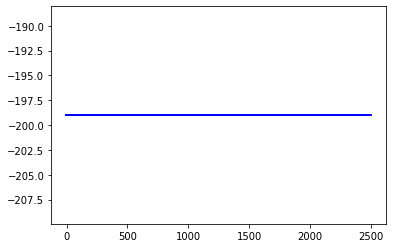

In [22]:
import sys
import gym
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 2500


# This is Policy Gradient agent for the Cartpole
# In this example, we use DPG algorithm which uses monte-carlo update rule
class DPGAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = True
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.hidden1, self.hidden2 = 24, 24

        # create model for policy network
        self.model = self.build_model()

        # lists for the states, actions and rewards
        self.states, self.actions, self.rewards = [], [], []

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_dpg.h5")

    # approximate policy using Neural Network
    # state is input and probability of each action is output of network
    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden1, input_dim=self.state_size, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.hidden2, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.action_size, activation='softmax', kernel_initializer='glorot_uniform'))
        model.summary()
        # Using categorical crossentropy as a loss is a trick to easily
        # implement the policy gradient. Categorical cross entropy is defined
        # H(p, q) = sum(p_i * log(q_i)). For the action taken, a, you set 
        # p_a = advantage. q_a is the output of the policy network, which is
        # the probability of taking the action a, i.e. policy(s, a). 
        # All other p_i are zero, thus we have H(p, q) = A * log(policy(s, a))
        model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=self.learning_rate))
        return model

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.model.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # In Policy Gradient, Q function is not available.
    # Instead agent uses sample returns for evaluating policy
    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, len(rewards))):
            running_add = running_add * self.discount_factor + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    # save <s, a ,r> of each step
    def append_sample(self, state, action, reward):
        self.states.append(state)
        self.rewards.append(reward)
        self.actions.append(action)

    # update policy network every episode
    def train_model(self):
        episode_length = len(self.states)

        discounted_rewards = self.discount_rewards(self.rewards)
        discounted_rewards -= np.mean(discounted_rewards)
        if np.std(discounted_rewards):
            discounted_rewards /= np.std(discounted_rewards)

        update_inputs = np.zeros((episode_length, self.state_size))
        advantages = np.zeros((episode_length, self.action_size))

        for i in range(episode_length):
            update_inputs[i] = self.states[i]
            advantages[i][self.actions[i]] = discounted_rewards[i]

        self.model.fit(update_inputs, advantages, epochs=1, verbose=0)
        self.states, self.actions, self.rewards = [], [], []

if __name__ == "__main__":
    # In case of CartPole-v1, you can play until 500 time step
    env = gym.make(envName)
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # make DPG agent
    agent = DPGAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # get action for the current state and go one step in environment
            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            reward = reward if not done or score == 499 else -100

            # save the sample <s, a, r> to the memory
            agent.append_sample(state, action, reward)

            score += reward
            state = next_state

            if done:
                # every episode, agent learns from sample returns
                agent.train_model()

                # every episode, plot the play time
                score = score if score == 500 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_dpg.png")
                print("episode:", e, "  score:", score)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_dpg.h5")
                    break

        # save the model
        if e % 100 == 0:
            agent.model.save_weights("./save_model/cartpole_dpg.h5")

In [27]:
if __name__ == "__main__":
    try:
        env = gym.make(envName)
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = DPGAgent(state_size, action_size)
        agent.load_model = 1
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./gym_monitor_output"
        env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
        for _ in range(10):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_88 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_89 (Dense)             (None, 3)                 75        
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


# Улучшения метода Policy Gradients

Такого большого набора твиков, как для DQN для DPG не наблюдается. Наиболее известны методы: TRPO (Trust Region Policy Optimization) и PPO (Proximal Policy Optimization). В них заложена несколько разная математика, но суть обоих методов в ограничении изменения весов за один прогон для того, чтобы выбросы не портили выученную стратегию.

# Комбинирование подходов

## Actor-critic

Можно взять две сети, одна из которых будет предсказывать действия, а вторая - оценивать, насколько эти действия хороши, т.е. выдавать значение Q. Помимо самих действий ей на вход мы так же подадим состояне.

<img src="actor_critic.png">

Плюс в том, что нам не обязательно дожидаться окончания эпизода для обучения.

## Advantage-Actor-Critic, A2C

Вместо вычисления градиентов от абсолютного значения \\( Q(s, a) \\) мы можем использовать относительное преимущество одний действия над другими \\( A(s, a) = Q(s, a) - V(s) \)). Тогда если \\( A(s, a) > 0 \\), то градиентный спуск будет изменять все веса, повышая вероятность предсказанных действий. Если же \\( A(s, a) < 0 \\), то градиентный спуск будет понижать вероятность таких действий. \\( V(s) \\) при этом показывает, насколько состояние хорошо само по себе: если мы в двух шагах от вершины Эвереста, то это очень хороший state, а если мы летим в пропасть, то state крайне фиговый, чтобы мы в нём не делали (если, конечно, у нас нет с собой парашюта).

При использовании такого подхода функцию Q(s, a) можно заменить прямо на полученное вознаграждение за некоторое действие вознаграждение r. Тогда \\( A(s,a) = r - V(s) \\). При этом получается, что сети Actor и Critic можно объединить в одну с двумя головами, что улучшает переиспользование весов и ускоряет обучение.

<img src="a2c.png" width=700>

A3C или Asynchronous Advantage Actor Critic - означает, что у нас есть сервер, собирающий результаты с нескольких Actor'ов и обновляющий веса, когда наберётся батч достаточного размера. 

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_76 (Dense)             (None, 3)                 75        
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 25        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: -199.0
episode: 

episode: 244   score: -199.0
episode: 245   score: -199.0
episode: 246   score: -199.0
episode: 247   score: -199.0
episode: 248   score: -199.0
episode: 249   score: -199.0
episode: 250   score: -199.0
episode: 251   score: -199.0
episode: 252   score: -199.0
episode: 253   score: -199.0
episode: 254   score: -199.0
episode: 255   score: -199.0
episode: 256   score: -199.0
episode: 257   score: -199.0
episode: 258   score: -199.0
episode: 259   score: -199.0
episode: 260   score: -199.0
episode: 261   score: -199.0
episode: 262   score: -199.0
episode: 263   score: -199.0
episode: 264   score: -199.0
episode: 265   score: -199.0
episode: 266   score: -199.0
episode: 267   score: -199.0
episode: 268   score: -199.0
episode: 269   score: -199.0
episode: 270   score: -199.0
episode: 271   score: -199.0
episode: 272   score: -199.0
episode: 273   score: -199.0
episode: 274   score: -199.0
episode: 275   score: -199.0
episode: 276   score: -199.0
episode: 277   score: -199.0
episode: 278  

episode: 527   score: -199.0
episode: 528   score: -199.0
episode: 529   score: -199.0
episode: 530   score: -199.0
episode: 531   score: -199.0
episode: 532   score: -199.0
episode: 533   score: -199.0
episode: 534   score: -199.0
episode: 535   score: -199.0
episode: 536   score: -199.0
episode: 537   score: -199.0
episode: 538   score: -199.0
episode: 539   score: -199.0
episode: 540   score: -199.0
episode: 541   score: -199.0
episode: 542   score: -199.0
episode: 543   score: -199.0
episode: 544   score: -199.0
episode: 545   score: -199.0
episode: 546   score: -199.0
episode: 547   score: -199.0
episode: 548   score: -199.0
episode: 549   score: -199.0
episode: 550   score: -199.0
episode: 551   score: -199.0
episode: 552   score: -199.0
episode: 553   score: -199.0
episode: 554   score: -199.0
episode: 555   score: -199.0
episode: 556   score: -199.0
episode: 557   score: -199.0
episode: 558   score: -199.0
episode: 559   score: -199.0
episode: 560   score: -199.0
episode: 561  

episode: 810   score: -199.0
episode: 811   score: -199.0
episode: 812   score: -199.0
episode: 813   score: -199.0
episode: 814   score: -199.0
episode: 815   score: -199.0
episode: 816   score: -199.0
episode: 817   score: -199.0
episode: 818   score: -199.0
episode: 819   score: -199.0
episode: 820   score: -199.0
episode: 821   score: -199.0
episode: 822   score: -199.0
episode: 823   score: -199.0
episode: 824   score: -199.0
episode: 825   score: -199.0
episode: 826   score: -199.0
episode: 827   score: -199.0
episode: 828   score: -199.0
episode: 829   score: -199.0
episode: 830   score: -199.0
episode: 831   score: -199.0
episode: 832   score: -199.0
episode: 833   score: -199.0
episode: 834   score: -199.0
episode: 835   score: -199.0
episode: 836   score: -199.0
episode: 837   score: -199.0
episode: 838   score: -199.0
episode: 839   score: -199.0
episode: 840   score: -199.0
episode: 841   score: -199.0
episode: 842   score: -199.0
episode: 843   score: -199.0
episode: 844  

episode: 1090   score: -199.0
episode: 1091   score: -199.0
episode: 1092   score: -199.0
episode: 1093   score: -199.0
episode: 1094   score: -199.0
episode: 1095   score: -199.0
episode: 1096   score: -199.0
episode: 1097   score: -199.0
episode: 1098   score: -199.0
episode: 1099   score: -199.0
episode: 1100   score: -199.0
episode: 1101   score: -199.0
episode: 1102   score: -199.0
episode: 1103   score: -199.0
episode: 1104   score: -199.0
episode: 1105   score: -199.0
episode: 1106   score: -199.0
episode: 1107   score: -199.0
episode: 1108   score: -199.0
episode: 1109   score: -199.0
episode: 1110   score: -199.0
episode: 1111   score: -199.0
episode: 1112   score: -199.0
episode: 1113   score: -199.0
episode: 1114   score: -199.0
episode: 1115   score: -199.0
episode: 1116   score: -199.0
episode: 1117   score: -199.0
episode: 1118   score: -199.0
episode: 1119   score: -199.0
episode: 1120   score: -199.0
episode: 1121   score: -199.0
episode: 1122   score: -199.0
episode: 1

episode: 1364   score: -199.0
episode: 1365   score: -199.0
episode: 1366   score: -199.0
episode: 1367   score: -199.0
episode: 1368   score: -199.0
episode: 1369   score: -199.0
episode: 1370   score: -199.0
episode: 1371   score: -199.0
episode: 1372   score: -199.0
episode: 1373   score: -199.0
episode: 1374   score: -199.0
episode: 1375   score: -199.0
episode: 1376   score: -199.0
episode: 1377   score: -199.0
episode: 1378   score: -199.0
episode: 1379   score: -199.0
episode: 1380   score: -199.0
episode: 1381   score: -199.0
episode: 1382   score: -199.0
episode: 1383   score: -199.0
episode: 1384   score: -199.0
episode: 1385   score: -199.0
episode: 1386   score: -199.0
episode: 1387   score: -199.0
episode: 1388   score: -199.0
episode: 1389   score: -199.0
episode: 1390   score: -199.0
episode: 1391   score: -199.0
episode: 1392   score: -199.0
episode: 1393   score: -199.0
episode: 1394   score: -199.0
episode: 1395   score: -199.0
episode: 1396   score: -199.0
episode: 1

episode: 1638   score: -199.0
episode: 1639   score: -199.0
episode: 1640   score: -199.0
episode: 1641   score: -199.0
episode: 1642   score: -199.0
episode: 1643   score: -199.0
episode: 1644   score: -199.0
episode: 1645   score: -199.0
episode: 1646   score: -199.0
episode: 1647   score: -199.0
episode: 1648   score: -199.0
episode: 1649   score: -199.0
episode: 1650   score: -199.0
episode: 1651   score: -199.0
episode: 1652   score: -199.0
episode: 1653   score: -199.0
episode: 1654   score: -199.0
episode: 1655   score: -199.0
episode: 1656   score: -199.0
episode: 1657   score: -199.0
episode: 1658   score: -199.0
episode: 1659   score: -199.0
episode: 1660   score: -199.0
episode: 1661   score: -199.0
episode: 1662   score: -199.0
episode: 1663   score: -199.0
episode: 1664   score: -199.0
episode: 1665   score: -199.0
episode: 1666   score: -199.0
episode: 1667   score: -199.0
episode: 1668   score: -199.0
episode: 1669   score: -199.0
episode: 1670   score: -199.0
episode: 1

episode: 1912   score: -199.0
episode: 1913   score: -199.0
episode: 1914   score: -199.0
episode: 1915   score: -199.0
episode: 1916   score: -199.0
episode: 1917   score: -199.0
episode: 1918   score: -199.0
episode: 1919   score: -199.0
episode: 1920   score: -199.0
episode: 1921   score: -199.0
episode: 1922   score: -199.0
episode: 1923   score: -199.0
episode: 1924   score: -199.0
episode: 1925   score: -199.0
episode: 1926   score: -199.0
episode: 1927   score: -199.0
episode: 1928   score: -199.0
episode: 1929   score: -199.0
episode: 1930   score: -199.0
episode: 1931   score: -199.0
episode: 1932   score: -199.0
episode: 1933   score: -199.0
episode: 1934   score: -199.0
episode: 1935   score: -199.0
episode: 1936   score: -199.0
episode: 1937   score: -199.0
episode: 1938   score: -199.0
episode: 1939   score: -199.0
episode: 1940   score: -199.0
episode: 1941   score: -199.0
episode: 1942   score: -199.0
episode: 1943   score: -199.0
episode: 1944   score: -199.0
episode: 1

episode: 2186   score: -199.0
episode: 2187   score: -199.0
episode: 2188   score: -199.0
episode: 2189   score: -199.0
episode: 2190   score: -199.0
episode: 2191   score: -199.0
episode: 2192   score: -199.0
episode: 2193   score: -199.0
episode: 2194   score: -199.0
episode: 2195   score: -199.0
episode: 2196   score: -199.0
episode: 2197   score: -199.0
episode: 2198   score: -199.0
episode: 2199   score: -199.0
episode: 2200   score: -199.0
episode: 2201   score: -199.0
episode: 2202   score: -199.0
episode: 2203   score: -199.0
episode: 2204   score: -199.0
episode: 2205   score: -199.0
episode: 2206   score: -199.0
episode: 2207   score: -199.0
episode: 2208   score: -199.0
episode: 2209   score: -199.0
episode: 2210   score: -199.0
episode: 2211   score: -199.0
episode: 2212   score: -199.0
episode: 2213   score: -199.0
episode: 2214   score: -199.0
episode: 2215   score: -199.0
episode: 2216   score: -199.0
episode: 2217   score: -199.0
episode: 2218   score: -199.0
episode: 2

episode: 2460   score: -199.0
episode: 2461   score: -199.0
episode: 2462   score: -199.0
episode: 2463   score: -199.0
episode: 2464   score: -199.0
episode: 2465   score: -199.0
episode: 2466   score: -199.0
episode: 2467   score: -199.0
episode: 2468   score: -199.0
episode: 2469   score: -199.0
episode: 2470   score: -199.0
episode: 2471   score: -199.0
episode: 2472   score: -199.0
episode: 2473   score: -199.0
episode: 2474   score: -199.0
episode: 2475   score: -199.0
episode: 2476   score: -199.0
episode: 2477   score: -199.0
episode: 2478   score: -199.0
episode: 2479   score: -199.0
episode: 2480   score: -199.0
episode: 2481   score: -199.0
episode: 2482   score: -199.0
episode: 2483   score: -199.0
episode: 2484   score: -199.0
episode: 2485   score: -199.0
episode: 2486   score: -199.0
episode: 2487   score: -199.0
episode: 2488   score: -199.0
episode: 2489   score: -199.0
episode: 2490   score: -199.0
episode: 2491   score: -199.0
episode: 2492   score: -199.0
episode: 2

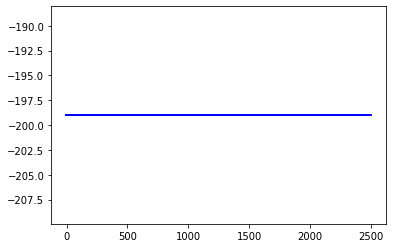

In [24]:
import sys
import gym
import pylab
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

EPISODES = 2500


# A2C(Advantage Actor-Critic) agent for the Cartpole
class A2CAgent:
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = True
        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size
        self.value_size = 1

        # These are hyper parameters for the Policy Gradient
        self.discount_factor = 0.99
        self.actor_lr = 0.001
        self.critic_lr = 0.005

        # create model for policy network
        self.actor = self.build_actor()
        self.critic = self.build_critic()

        if self.load_model:
            self.actor.load_weights("./save_model/cartpole_actor.h5")
            self.critic.load_weights("./save_model/cartpole_critic.h5")

    # approximate policy and value using Neural Network
    # actor: state is input and probability of each action is output of model
    def build_actor(self):
        actor = Sequential()
        actor.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        actor.add(Dense(self.action_size, activation='softmax',
                        kernel_initializer='he_uniform'))
        actor.summary()
        # See note regarding crossentropy in cartpole_reinforce.py
        actor.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=self.actor_lr))
        return actor

    # critic: state is input and value of state is output of model
    def build_critic(self):
        critic = Sequential()
        critic.add(Dense(24, input_dim=self.state_size, activation='relu',
                         kernel_initializer='he_uniform'))
        critic.add(Dense(self.value_size, activation='linear',
                         kernel_initializer='he_uniform'))
        critic.summary()
        critic.compile(loss="mse", optimizer=Adam(lr=self.critic_lr))
        return critic

    # using the output of policy network, pick action stochastically
    def get_action(self, state):
        policy = self.actor.predict(state, batch_size=1).flatten()
        return np.random.choice(self.action_size, 1, p=policy)[0]

    # update policy network every episode
    def train_model(self, state, action, reward, next_state, done):
        target = np.zeros((1, self.value_size))
        advantages = np.zeros((1, self.action_size))

        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]

        if done:
            advantages[0][action] = reward - value
            target[0][0] = reward
        else:
            advantages[0][action] = reward + self.discount_factor * (next_value) - value
            target[0][0] = reward + self.discount_factor * next_value

        self.actor.fit(state, advantages, epochs=1, verbose=0)
        self.critic.fit(state, target, epochs=1, verbose=0)


if __name__ == "__main__":
    # In case of CartPole-v1, maximum length of episode is 500
    env = gym.make(envName)
    # get size of state and action from environment
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # make A2C agent
    agent = A2CAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        state = env.reset()
        state = np.reshape(state, [1, state_size])

        while not done:
            if agent.render:
                env.render()

            action = agent.get_action(state)
            next_state, reward, done, info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # if an action make the episode end, then gives penalty of -100
            reward = reward if not done or score == 499 else -100

            agent.train_model(state, action, reward, next_state, done)

            score += reward
            state = next_state

            if done:
                # every episode, plot the play time
                score = score if score == 500.0 else score + 100
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_a2c.png")
                print("episode:", e, "  score:", score)

                # if the mean of scores of last 10 episode is bigger than 490
                # stop training
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    break

        # save the model
        if e % 100 == 0:
            agent.actor.save_weights("./save_model/cartpole_actor.h5")
            agent.critic.save_weights("./save_model/cartpole_critic.h5")

In [26]:
if __name__ == "__main__":
    try:
        env = gym.make(envName)
        state_size = env.observation_space.shape[0]
        action_size = env.action_space.n
        agent = A2CAgent(state_size, action_size)
        agent.load_model = 1
        agent.epsilon = 0

        # Use the Gym Monitor wrapper to evaluate the agent and record video
        gym_monitor_path = "./gym_monitor_output"
        env = gym.wrappers.Monitor(env, gym_monitor_path, force=True)
        for _ in range(10):
                done = False
                obs = env.reset()
                obs = np.reshape(obs, [1, state_size])
                total_reward = 0.0
                while not done:
                    action = agent.get_action(obs)
                    next_obs, reward, done, info = env.step(action)
                    next_obs = np.reshape(next_obs, [1, state_size])
                    obs = next_obs
                    total_reward += reward
    finally:
        env.close()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_84 (Dense)             (None, 3)                 75        
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 24)                72        
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 25        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


# Model-based

Ещё один подход заключается в том, что мы можем обучать нейросеть предсказывать следующее состояние среды, подавая ей на вход действия и предыдущее состояние. Таким образом нейросеть учит поведение среды. Для того, чтобы выбрать оптимальные действия, нам придётся прогнать все возможные действия через предсказание нейросети, поэтому такой подход применим только при малой размерности пространства действий.

# Imitation learning

Для того, чтобы агент выучил сложную последовательность действий, можно искуственно поставить его в конец этой траектории, тогда он быстро выучит, как пройти небольшой участок. После этого его можно поставить чуть дальше и так, пока агент на научится выполнять всю последовательность. 